In [0]:
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/survey_results_public.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# IT job market
The goal of this analysis is to find what IT professionals do, what is their job satisfaction and from what background they come from.

*The data comes from Stack Overflow 2018 Developer*

In [0]:
df.shape

(98855, 129)

In [0]:
df2 = df.loc[df.Country == 'Poland']
df2['czlowiek'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df3 = df2.pivot_table(index='Student', columns='CareerSatisfaction')
df3


AdsPriorities1                      \
CareerSatisfaction Extremely dissatisfied Extremely satisfied   
Student                                                         
No                               2.333333            2.510949   
Yes, full-time                   1.600000            2.843750   
Yes, part-time                   3.666667            3.181818   

                                                                 \
CareerSatisfaction Moderately dissatisfied Moderately satisfied   
Student                                                           
No                                2.791045             2.545994   
Yes, full-time                    3.133333             2.830986   
Yes, part-time                    4.500000             2.648649   

                                                                             \
CareerSatisfaction Neither satisfied nor dissatisfied Slightly dissatisfied   
Student                                                                       
No                                           2.932203              3.391892   
Yes, full-time                               3.157895              2.500000   
Yes, part-time                               2.857143              2.857143   

                                              AdsPriorities2  \
CareerSatisfaction Slightly satisfied Extremely dissatisfied   
Student                                                        
No                             2.9000               4.190476   
Yes, full-time                 3.0625               4.000000   
Yes, part-time                 3.2000               3.000000   

                                                                ...  \
CareerSatisfaction Extremely satisfied Moderately dissatisfied  ...   
Student                                                         ...   
No                            3.832117                3.746269  ...   
Yes, full-time                3.656250                3.800000  ...   
Yes, part-time                3.590909                3.250000  ...   

                                           Respondent                        \
CareerSatisfaction Neither satisfied nor dissatisfied Slightly dissatisfied   
Student                                                                       
No                                       47174.280488          50381.415842   
Yes, full-time                           58017.666667          47080.062500   
Yes, part-time                           65592.642857          47237.545455   

                                                    czlowiek  \
CareerSatisfaction Slightly satisfied Extremely dissatisfied   
Student                                                        
No                       50880.251852                      1   
Yes, full-time           54920.061538                      1   
Yes, part-time           54788.250000                      1   

                                                                \
CareerSatisfaction Extremely satisfied Moderately dissatisfied   
Student                                                          
No                                   1                       1   
Yes, full-time                       1                       1   
Yes, part-time                       1                       1   

                                                                            \
CareerSatisfaction Moderately satisfied Neither satisfied nor dissatisfied   
Student                                                                      
No                                    1                                  1   
Yes, full-time                        1                                  1   
Yes, part-time                        1                                  1   

                                                             
CareerSatisfaction Slightly dissatisfied Slightly satisfied  
Student                                                      
No                                

# **What are the most popular IT jobs in Poland ?**

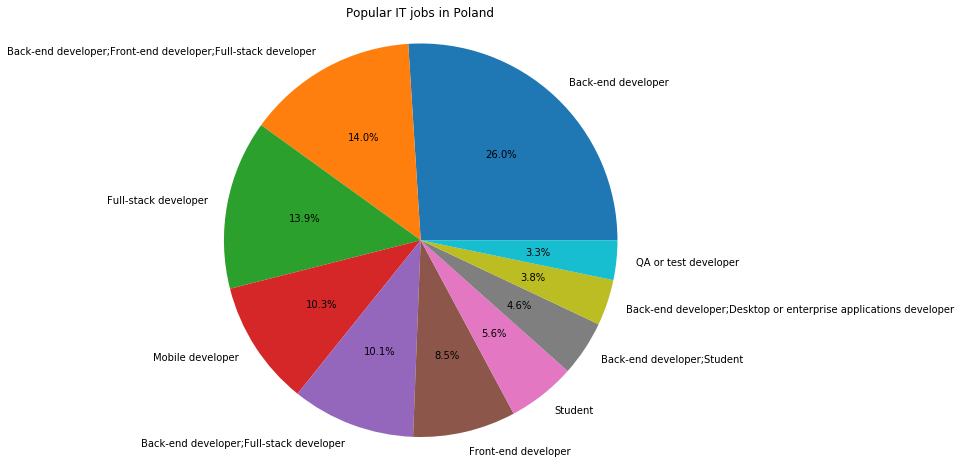

In [0]:
plt.figure(figsize=(10,8))
df[df['Country']=='Poland'].DevType.value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.title('Popular IT jobs in Poland')
plt.ylabel('')
plt.axis('equal')
plt.show()

# Is there a typical academic background of a software developer ?

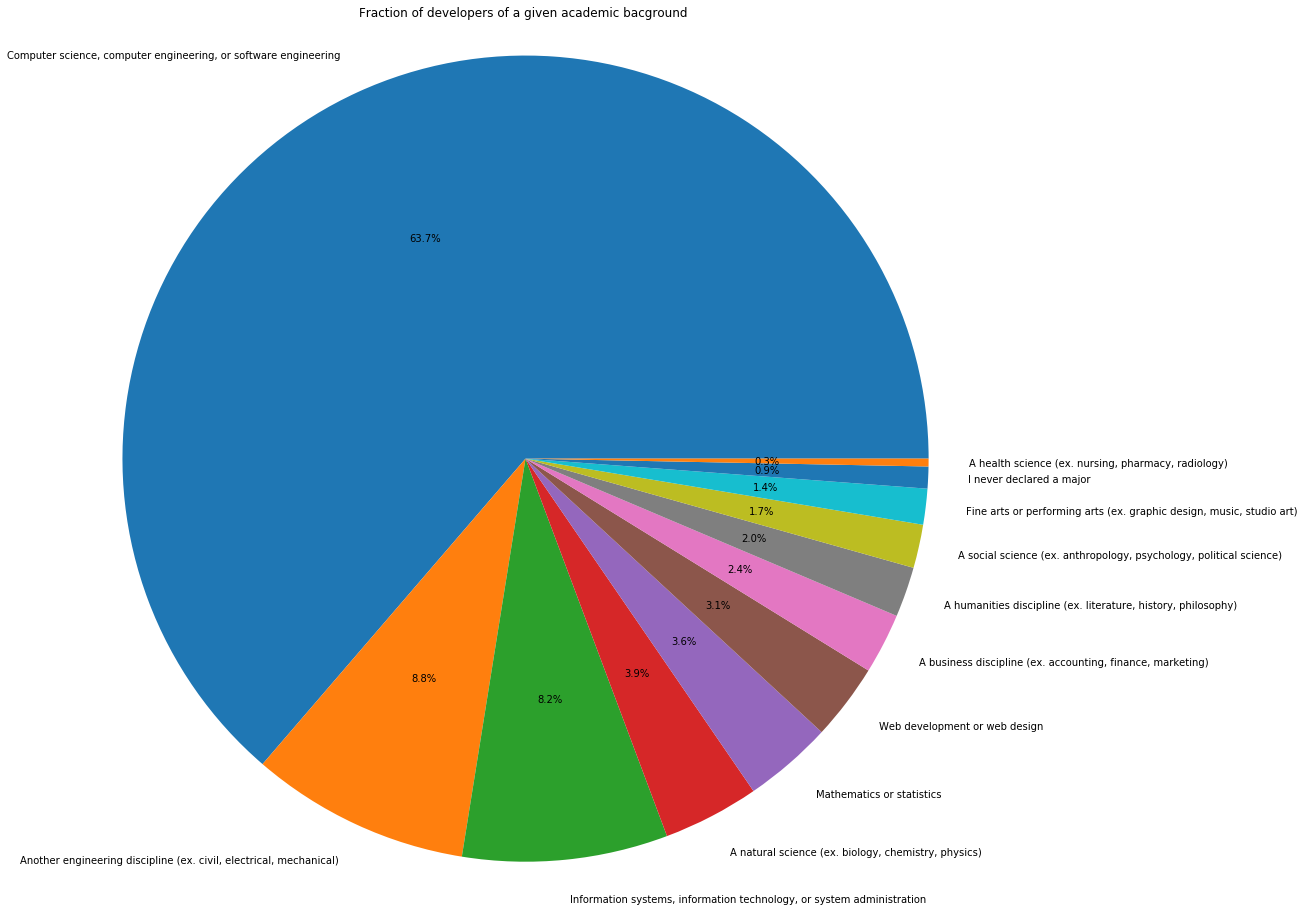

In [0]:
plt.figure(figsize=(16,16))
df.UndergradMajor.value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fraction of developers of a given academic bacground')
plt.ylabel('')
plt.show()

# **What types of employment are most common among developers ?**

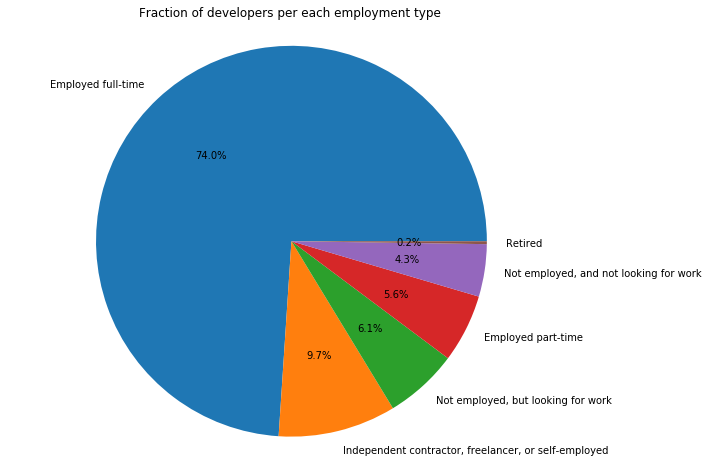

In [0]:
plt.figure(figsize=(10,8))
df.Employment.value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fraction of developers per each employment type')
plt.ylabel('')
plt.show()

In [0]:
poland=df[df['Country']=='Poland']

In [0]:
poland_jobs=poland[['DevType','CompanySize','Employment','Age']]

In [0]:
poland_jobs.isnull().sum()/len(poland_jobs)

DevType        0.068332
CompanySize    0.331762
Employment     0.024034
Age            0.340716
dtype: float64

In [0]:
poland_jobs.Age.value_counts(normalize=True)

25 - 34 years old     0.606862
18 - 24 years old     0.250179
35 - 44 years old     0.114367
Under 18 years old    0.015726
45 - 54 years old     0.010722
55 - 64 years old     0.001430
65 years or older     0.000715
Name: Age, dtype: float64

In [0]:
poland_jobs['Age']=poland_jobs['Age'].fillna('25 - 34 years old')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
poland_jobs['Age'].isnull().sum()

0

In [0]:
poland_jobs.CompanySize.value_counts(normalize=True)

20 to 99 employees          0.249647
100 to 499 employees        0.212271
10,000 or more employees    0.156559
1,000 to 4,999 employees    0.110719
10 to 19 employees          0.102257
500 to 999 employees        0.057828
Fewer than 10 employees     0.055712
5,000 to 9,999 employees    0.055007
Name: CompanySize, dtype: float64

In [0]:
poland_jobs['CompanySize']=poland_jobs['CompanySize'].fillna('Unknown')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
poland_jobs['CompanySize'].isnull().sum()

0

In [0]:
poland_jobs.isnull().sum()/len(poland_jobs)

DevType        0.068332
CompanySize    0.000000
Employment     0.024034
Age            0.000000
dtype: float64

In [0]:
poland_jobs=poland_jobs.dropna()

In [0]:
poland_jobs.isnull().sum()

DevType        0
CompanySize    0
Employment     0
Age            0
dtype: int64

In [0]:
poland_jobs.head()

,DevType,CompanySize,Employment,Age
30,Back-end developer;Engineering manager,20 to 99 employees,Employed full-time,25 - 34 years old
34,Designer,"10,000 or more employees",Employed full-time,35 - 44 years old
90,Back-end developer;Desktop or enterprise appli...,20 to 99 employees,Employed full-time,25 - 34 years old
119,Front-end developer,500 to 999 employees,Employed full-time,25 - 34 years old
131,Back-end developer;Data or business analyst;Da...,20 to 99 employees,Employed full-time,25 - 34 years old


In [0]:
names_of_positions=[]
for i in poland_jobs.DevType.str.split(pat=';'):
    for j in i:
        names_of_positions.append(j)
        
df_dev_type_poland=pd.DataFrame(names_of_positions,columns=['position name'])

# **What are the most popular jobs in IT?**

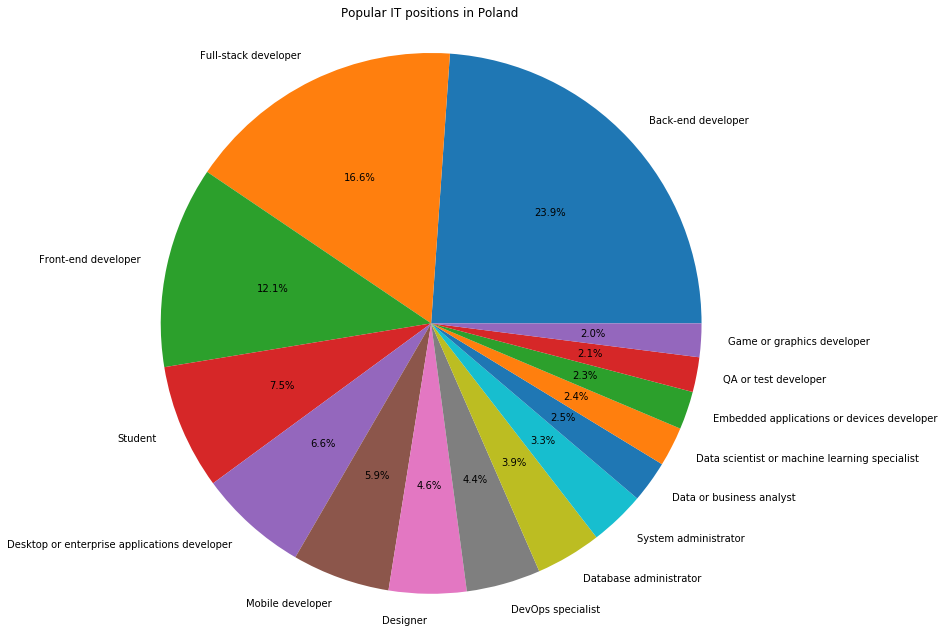

In [0]:
plt.figure(figsize=(15,11))
df_dev_type_poland['position name'].value_counts().head(15).plot.pie(autopct='%1.1f%%')
plt.title('Popular IT positions in Poland')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [0]:
usa=df[df.Country=='United States']

In [0]:
usa_jobs=usa[['DevType','CompanySize','Employment','Age']]

In [0]:
usa_jobs.isnull().sum()/len(usa_jobs)

DevType        0.045251
CompanySize    0.203506
Employment     0.017775
Age            0.231818
dtype: float64

In [0]:
usa_jobs.Age.value_counts(normalize=True)

25 - 34 years old     0.462855
35 - 44 years old     0.223640
18 - 24 years old     0.167489
45 - 54 years old     0.085507
55 - 64 years old     0.029357
Under 18 years old    0.025896
65 years or older     0.005256
Name: Age, dtype: float64

In [0]:
usa_jobs['Age']=usa_jobs['Age'].fillna('25 - 34 years old')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
usa_jobs.CompanySize.value_counts(normalize=True)

10,000 or more employees    0.213835
100 to 499 employees        0.197453
20 to 99 employees          0.189726
1,000 to 4,999 employees    0.123393
10 to 19 employees          0.075297
500 to 999 employees        0.075049
Fewer than 10 employees     0.068187
5,000 to 9,999 employees    0.057060
Name: CompanySize, dtype: float64

In [0]:
usa_jobs['CompanySize']=usa_jobs['CompanySize'].fillna('Unknown')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
usa_jobs.isnull().sum()/len(usa_jobs)

DevType        0.045251
CompanySize    0.000000
Employment     0.017775
Age            0.000000
dtype: float64

In [0]:
usa_jobs=usa_jobs.dropna()

In [0]:
usa_jobs.isnull().sum()

DevType        0
CompanySize    0
Employment     0
Age            0
dtype: int64

# **What are the most popular jobs in USA?**

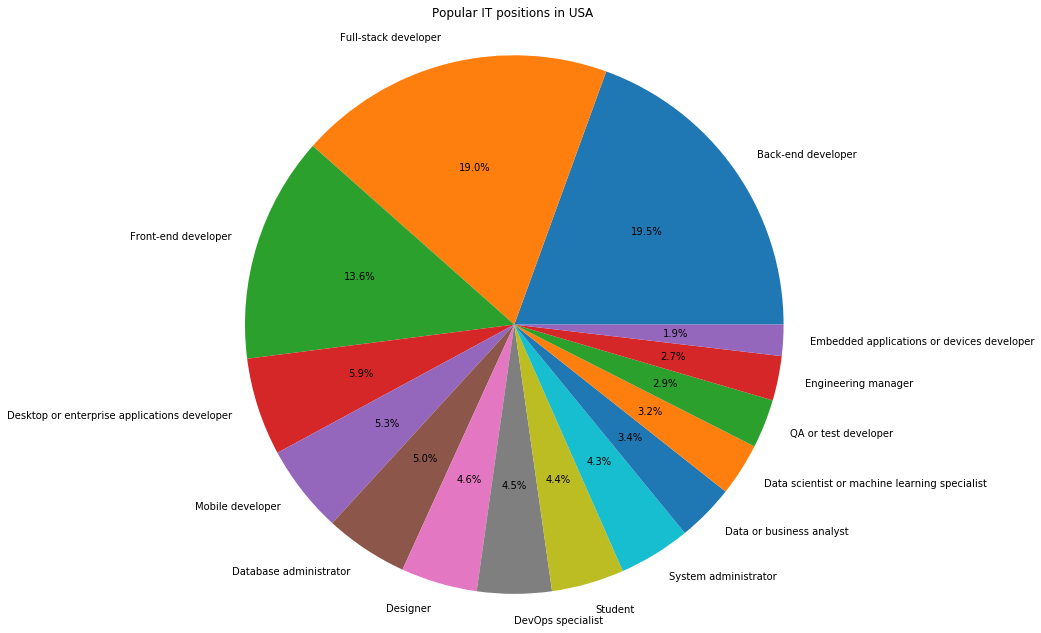

In [0]:
names_of_positions_usa=[]
for i in usa_jobs.DevType.str.split(pat=';'):
    for j in i:
        names_of_positions_usa.append(j)
        
df_dev_type_usa=pd.DataFrame(names_of_positions_usa,columns=['position name'])
plt.figure(figsize=(15,11))
df_dev_type_usa['position name'].value_counts().head(15).plot.pie(autopct='%1.1f%%')
plt.title('Popular IT positions in USA')
plt.ylabel('')
plt.axis('equal')
plt.show()

# **How big is employees fluctuancy in IT?**

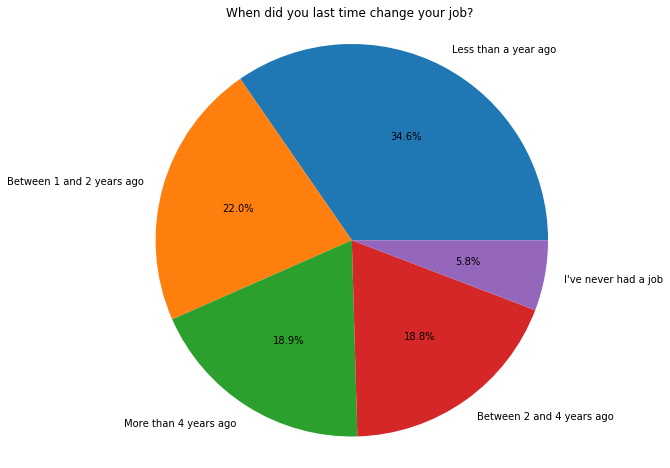

In [0]:
plt.figure(figsize=(10,8))
df.LastNewJob.value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('When did you last time change your job?')
plt.ylabel('')
plt.show()

# **Comparison of female and male job satisfaction.**

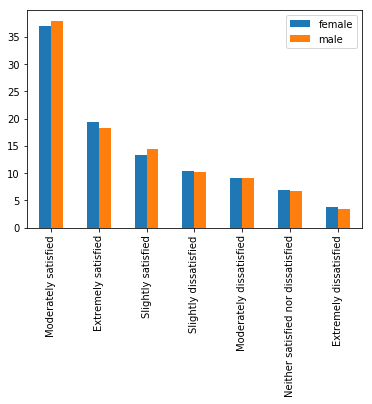

In [0]:
female_satisfaction = df[df['Gender']=='Female'].JobSatisfaction.value_counts(normalize=True)*100
male_satisfaction = df[df['Gender']=='Male'].JobSatisfaction.value_counts(normalize=True)*100
dfsat = pd.DataFrame({'female': female_satisfaction, 'male': male_satisfaction})
ax = dfsat.plot.bar()

# Comparison of job satisfaction in various sizes of companies.**bold text**

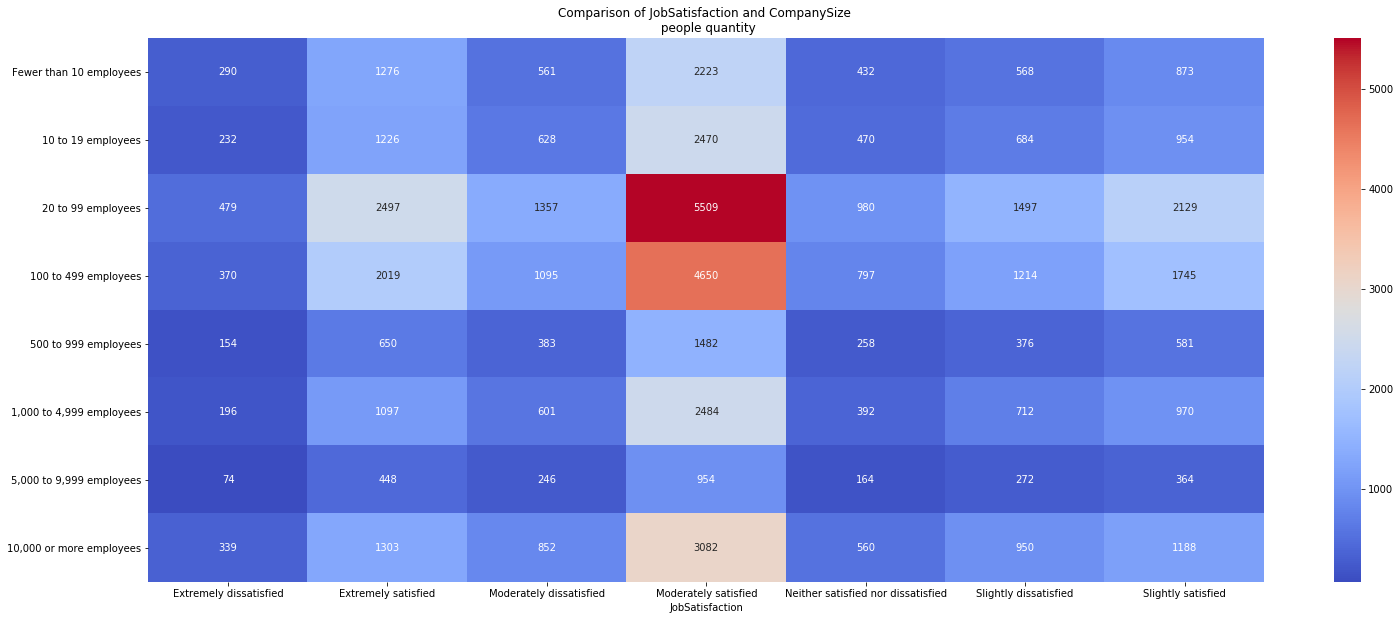

In [0]:
# porownanie satysfakcji pracy z wielkoscia firm w ktorych pracuja
import seaborn as sns
import numpy as np

df['czlowiek'] = 1 # jezeli ktos ogarnalby jak zliczych Respondentów to nie trzeba by tak pójść na łatwiznę
aa = pd.pivot_table(df,
                    values = 'czlowiek',
                   index = 'JobSatisfaction',
                   columns = 'CompanySize',
                    aggfunc = 'sum'
                   )
aa
new_table = pd.DataFrame([aa['Fewer than 10 employees'], aa['10 to 19 employees'], aa['20 to 99 employees'], aa['100 to 499 employees'],
                         aa['500 to 999 employees'], aa['1,000 to 4,999 employees'], aa['5,000 to 9,999 employees'], aa['10,000 or more employees']])
new_table
plt.figure(figsize=(25,10))
sns.heatmap(new_table, annot=True, fmt="d", cmap='coolwarm', label = 'people quantity') # kolor wedlug uznania nie wiem jaki pasuje
plt.title('Comparison of JobSatisfaction and CompanySize \n people quantity')
plt.show()

# How salary in IT depend on education?

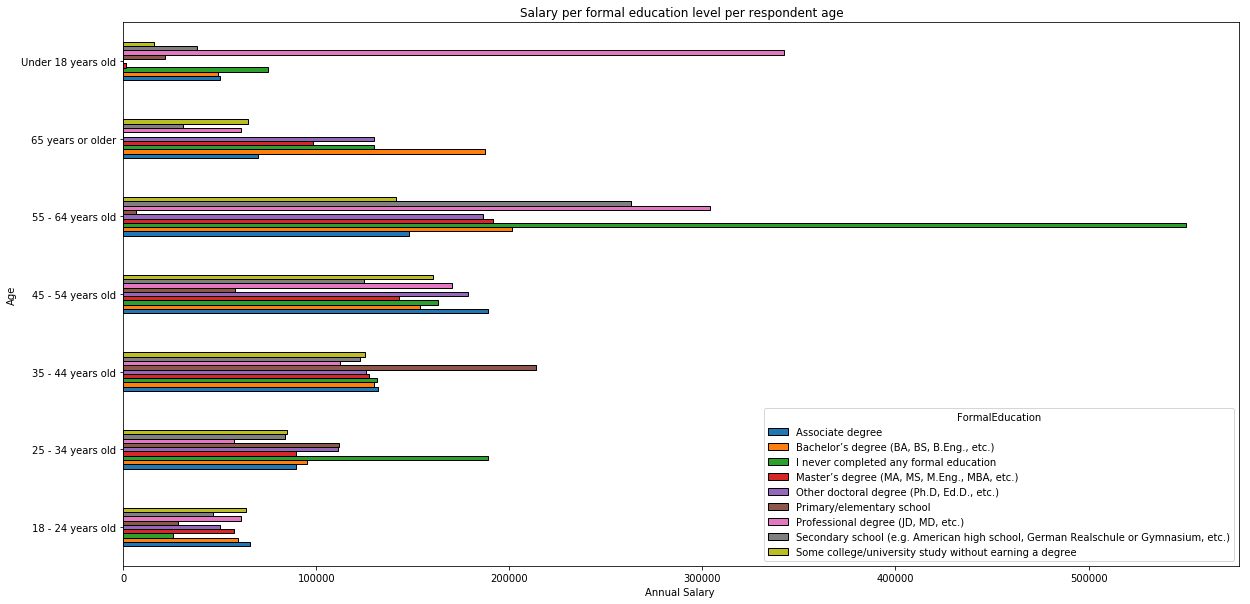

In [0]:
# wynagrodzenie zalezne od wieku i poziomu wyksztalcenia
a = pd.pivot_table(df,
                   values = 'ConvertedSalary',
                   index = 'Age',
                   columns = 'FormalEducation',
                   aggfunc = 'mean'
                  )

a.plot.barh(figsize=(20, 10), edgecolor = "black")
plt.title('Salary per formal education level per respondent age')
plt.xlabel('Annual Salary ')
plt.show()

General group size = 56.99999999999999%


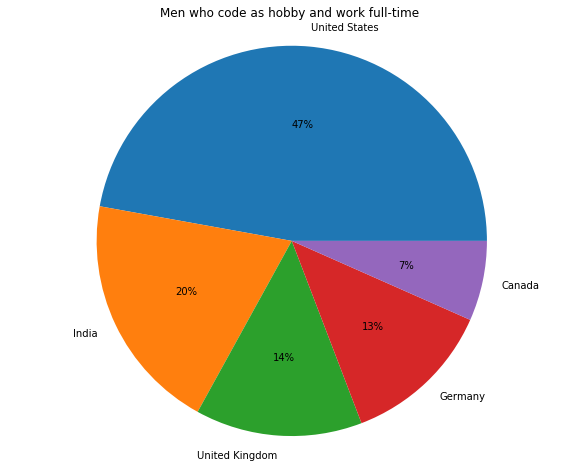

Size of men group = 37.0%


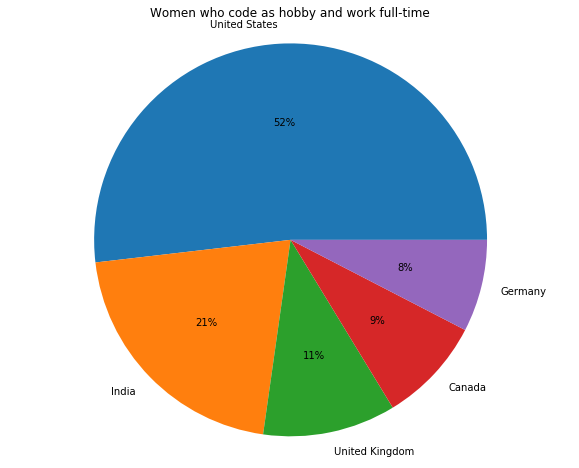

Size of women group = 2.0%


In [0]:
a=str((round((len(df[(df.Employment == 'Employed full-time') & (df.Hobby == 'Yes')])/len(df)),2))*100) + '%'
      
df8 = df[(df.Employment == 'Employed full-time in IT') & (df.Hobby == 'Yes') ]
df8

print('General group size = ' + str(a)) 
  
plt.figure(figsize=(10,8))
df[(df.Employment == 'Employed full-time') & (df.Hobby == 'Yes') & (df.Gender == 'Male')].Country.value_counts().head(5).plot.pie(autopct='%1.0f%%')
plt.title('Men who code as hobby and work full-time')
plt.ylabel('') 
plt.axis('equal')
plt.show()

b=str((round((len(df[(df.Employment == 'Employed full-time') & (df.Hobby == 'Yes') & (df.Gender == 'Male')])/len(df)),2))*100) + '%'
print('Size of men group = ' + str(b))


plt.figure(figsize=(10,8))
df[(df.Employment == 'Employed full-time') & (df.Hobby == 'Yes') & (df.Gender == 'Female')].Country.value_counts().head(5).plot.pie(autopct='%1.0f%%')
plt.title('Women who code as hobby and work full-time in IT')
plt.ylabel('') 
plt.axis('equal')
plt.show()


c=str((round((len(df[(df.Employment == 'Employed full-time') & (df.Hobby == 'Yes') & (df.Gender == 'Female')])/len(df)),2))*100) + '%'
print('Size of women group = ' + str(c))

##After analysing these graphs we can conlcude that:
1. Popularity of differenet IT positions in Poland and USA is similar.
2. IT industry is a type of business with a lot of turnover. Employees often change their job, that maybe because big companies fight for good workers and offer better salary just to get them which causes fluctuation.
3. Only 63,7% of software developers have academic background which means that there are a lot of self-educated people in IT and most of them work full time.
4. There is no diffrence in job satisfaction between men and women.
5. Companies with 20-500 poeple have the most satisfied employees.
6. Academic background is not a necessary condition for good salary in IT.
7. There are no significant difference between men, and women salaries in IT.
8. In USA, the leading country in IT, more people treat programming as hobby. 